Trabalho Prático 2 desenvolvido por Alex Talles Viana

Será desenvolvido três classificadores que utilizará a base de detecção de fraudes (https://www.kaggle.com/mlg-ulb/creditcardfraud) e verificar, para cada modelo de classificação, qual é o conjunto mínimo de características que maximiza o score.

In [1]:
# Importando as bibliotecas necessárias ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Importando o Dataset ...
ds_creditcard = pd.read_csv('creditcard.csv')

In [3]:
# Visualizando os dados ...
ds_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Verificando se existe dados faltantes ...
ds_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
# A variável resposta é: Class (1 para transações fraudulentas) e (0 para transações não fraudulentas).

In [9]:
# Pré-Processamento dos Dados:
# 1) Escalando os dados, ou seja, assumem que todos os dados estão na mesma escala ...
# 2) Realizando a transformação dos dados ...

X = ds_creditcard.copy()
X.drop(['Class','Time'], axis = 1, inplace = True)
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X)
y = ds_creditcard['Class']

In [10]:
# Verificando como a escala ficou distribuída através da coluna Time ...
ds_creditcard['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [11]:
# Criando as variáveis para treinar o modelo ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [12]:
# Treinando o modelo: DecisionTree

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

decisionTreePredict = decisionTree.predict(X_test)

decisionTreeRecallScore = recall_score(y_test, decisionTreePredict)
print(decisionTreeRecallScore)

0.7464788732394366


In [14]:
cols = list(ds_creditcard.columns)
cols.remove('Class')
cols.remove('Time')
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

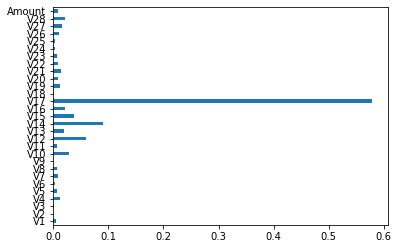

In [15]:
# Determinando a importância das features no modelo com as 29 features ...
pd.Series(np.abs(decisionTree.feature_importances_), index = cols).plot(kind = 'barh')

In [ ]:
# As features com maior grau de importância são: V10, V12, V14, V16 e V17.

In [16]:
decisionTree.score(X_test, y_test)

0.9989934810341398

In [13]:
# Criando as variáveis para treinar o modelo ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
# Treinando o modelo: KNN 

# O parâmetro metric indica a medida de distância utilizada.
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)

knnPredict = knn.predict(X_test)

knnRecallScore = recall_score(y_test, knnPredict)
print(knnRecallScore)

In [ ]:
# Determinando a importância das features no modelo com as 29 features ...
pd.Series(np.abs(knn.feature_importances_), index = cols).plot(kind = 'barh')

In [ ]:
knn.score(X_test, y_test)

In [17]:
# Criando as variáveis para treinar o modelo ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [18]:
# Treinando o modelo: Regressão Logística

logisticRegression = LogisticRegression(solver = "lbfgs", multi_class = "auto", max_iter = 500)
logisticRegression.fit(X_train, y_train)

logisticRegressionPredict = logisticRegression.predict(X_test)

logisticRecallScore = recall_score(y_test, logisticRegressionPredict)
print(logisticRecallScore)

0.647887323943662


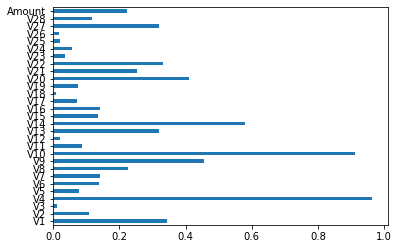

In [20]:
# Determinando a importância das features no modelo com as 29 features ...
pd.Series(np.abs(logisticRegression.coef_.flatten()), index=cols).plot(kind='barh')

In [ ]:
# As features com maior grau de importância são: V1, V4, V9, V10, V14, V20, V21, V22 e V27.

In [22]:
X = ds_creditcard[['V1', 'V4', 'V9', 'V10', 'V14', 'V20', 'V21', 'V22', 'V27']]
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X)
y = ds_creditcard['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [26]:
# Treinando o modelo com as features com maior grau de importância ... 

logisticRegression = LogisticRegression(solver = "lbfgs", multi_class = "auto", max_iter = 500)
logisticRegression.fit(X_train, y_train)

logisticRegressionPredict = logisticRegression.predict(X_test)

logisticRecallScore = recall_score(y_test, logisticRegressionPredict)
print(logisticRecallScore)

0.6338028169014085


In [27]:
logisticRegression.score(X_test, y_test)

0.9990051847430451

Conclusão:
    
Observou-se que após o re-treino do modelo LogisticRegression, utilizando as features (V1, V4, V9, V10, V14, V20, V21, V22, V27) com grau de importância, o valor do Recall Score foi de 0.6338028169014085, bem próximo do modelo com 29 features.
    